In [2]:
import json
import matplotlib.pyplot as plt

# Read the test cases
with open('public_cases.json', 'r') as f:
    test_cases = json.load(f)

# Extract data
trip_durations = [case['input']['trip_duration_days'] for case in test_cases]
miles = [case['input']['miles_traveled'] for case in test_cases]
receipts = [case['input']['total_receipts_amount'] for case in test_cases]
expected_outputs = [case['expected_output'] for case in test_cases]

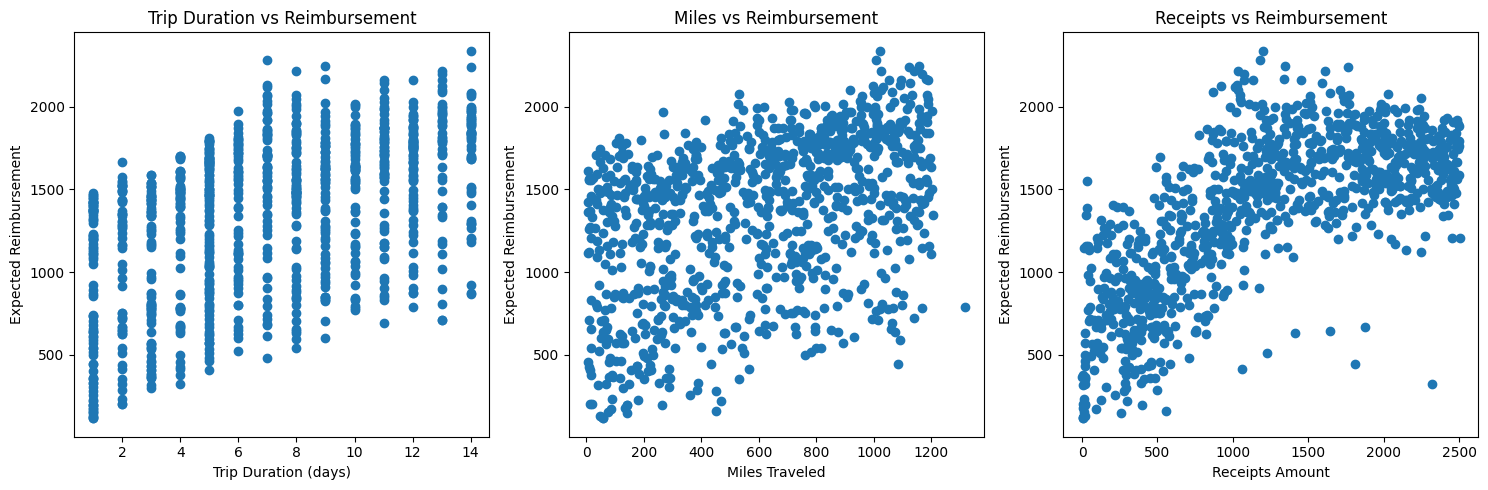

In [3]:
plt.figure(figsize=(15, 5))

# Plot trip duration vs expected output
plt.subplot(131)
plt.scatter(trip_durations, expected_outputs)
plt.xlabel('Trip Duration (days)')
plt.ylabel('Expected Reimbursement')
plt.title('Trip Duration vs Reimbursement')

# Plot miles traveled vs expected output
plt.subplot(132)
plt.scatter(miles, expected_outputs)
plt.xlabel('Miles Traveled')
plt.ylabel('Expected Reimbursement')
plt.title('Miles vs Reimbursement')

# Plot receipts amount vs expected output
plt.subplot(133)
plt.scatter(receipts, expected_outputs)
plt.xlabel('Receipts Amount')
plt.ylabel('Expected Reimbursement')
plt.title('Receipts vs Reimbursement')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [26]:
# Import required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data (we already have test_cases loaded)
X = np.array([[
    case['input']['trip_duration_days'],
    case['input']['miles_traveled'],
    case['input']['total_receipts_amount']
] for case in test_cases])

y = np.array([case['expected_output'] for case in test_cases])

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print(f"Training R² score: {train_score:.3f}")
print(f"Test R² score: {test_score:.3f}")
print(f"Mean squared error: {mse:.3f}")

# Show feature importance
feature_names = ['Trip Duration', 'Miles', 'Receipts']
for name, importance in zip(feature_names, model.feature_importances_):
    print(f"{name}: {importance:.3f}")

# Example prediction
example_input = np.array([[3, 100, 50]])  # 3 days, 100 miles, $50 in receipts
example_scaled = scaler.transform(example_input)
prediction = model.predict(example_scaled)[0]
print(f"\nExample prediction for 3 days, 100 miles, $50 in receipts: ${prediction:.2f}")

Training R² score: 0.979
Test R² score: 0.908
Mean squared error: 21476.799
Trip Duration: 0.175
Miles: 0.161
Receipts: 0.664

Example prediction for 3 days, 100 miles, $50 in receipts: $412.95


Model Performance:
R² Score (Train): 0.784
R² Score (Test): 0.781
Mean Squared Error: 43593.331

Linear Regression Coefficients:
Trip Duration: 196.618
Miles: 164.661
Receipts: 286.688
Intercept: 1337.276

Example prediction for 3 days, 100 miles, $50 in receipts: $469.31


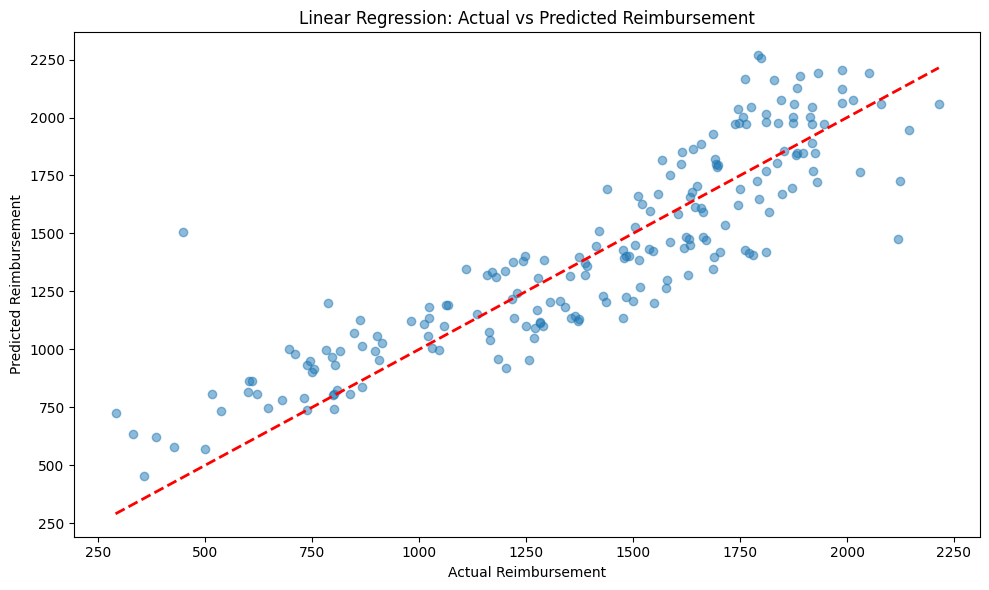

In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Print model performance
print("Model Performance:")
print(f"R² Score (Train): {lr_model.score(X_train_scaled, y_train):.3f}")
print(f"R² Score (Test): {lr_model.score(X_test_scaled, y_test):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")

# Print coefficients
feature_names = ['Trip Duration', 'Miles', 'Receipts']
print("\nLinear Regression Coefficients:")
for name, coef in zip(feature_names, lr_model.coef_):
    print(f"{name}: {coef:.3f}")
print(f"Intercept: {lr_model.intercept_:.3f}")

# Example prediction
example_input = np.array([[3, 100, 50]])  # 3 days, 100 miles, $50 in receipts
example_scaled = scaler.transform(example_input)
prediction = lr_model.predict(example_scaled)[0]
print(f"\nExample prediction for 3 days, 100 miles, $50 in receipts: ${prediction:.2f}")

# Optional: Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Reimbursement')
plt.ylabel('Predicted Reimbursement')
plt.title('Linear Regression: Actual vs Predicted Reimbursement')
plt.tight_layout()
plt.show()